In [160]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [161]:
# Define helper functions

def print_at_index(idx):
    """Prints relevant information on tweet record at a given index."""
    tweet = data.iloc[idx]
    print(tweet['Candidate'])
    print(tweet['Cleaned Tweet Text'])
    print(round(tweet['Sentiment Score'], 2), tweet['Sentiment Bucket'])
    

## Load tweet-level data and assemble summary statistics for plotting

In [162]:
# Load data
data = pd.read_csv('all_candidates.csv')
data


,Unnamed: 0,Date,Favorite Count,Retweet Count,Tweet Text,Candidate,Cleaned Tweet Text,Sentiment Score,Sentiment Bucket
0,792,2019-05-02,1,1,b'@tedcruz Michael Bennet molly whopped you on...,bennet,Michael Bennet molly whopped you on the Senate...,0.000000,Neutral
1,793,2019-05-02,0,0,b'Sen. Michael Bennet announces a 2020 preside...,bennet,Sen Michael Bennet announces a 2020 presidenti...,0.000000,Neutral
2,794,2019-05-02,0,0,b'Senator Michael Bennet Announces Presidentia...,bennet,Senator Michael Bennet Announces Presidential ...,0.000000,Neutral
3,795,2019-05-02,4,1,b'Colorado Sen. Michael Bennet announces 2020 ...,bennet,Colorado Sen Michael Bennet announces 2020 cam...,0.400000,Positive
4,796,2019-05-02,0,0,b'Colorado Senator Michael Bennet announces 20...,bennet,Colorado Senator Michael Bennet announces 2020...,0.000000,Neutral
5,797,2019-05-02,0,0,b'&lt;em&gt;The Atlantic&lt;/em&gt; Politics &...,bennet,&lt;em&gt;The Atlantic&lt;/em&gt Politics &amp...,-0.083333,Negative
6,798,2019-05-02,0,0,b'Pretty much: https://t.co/FurhH9uBuG',bennet,Pretty much,0.225000,Positive
7,799,2019-05-02,0,0,"b""Michael Bennet Enters 2020 Race -- 'My Plan ...",bennet,Michael Bennet Enters 2020 Race My Plan Is to...,0.000000,Neutral
8,800,2019-05-02,0,0,b'The Atlantic Politics &amp; Policy Daily: Le...,bennet,The Atlantic Politics &amp Policy Daily Less I...,-0.083333,Negative
9,801,2019-05-02,1,1,b'One reason Ted Cruz is attack Michael Bennet...,bennet,One reason Ted Cruz is attack Michael Bennet B...,0.000000,Neutral


In [215]:
# Count tweets in each sentiment bucket
snowman_counts = pd.DataFrame(data.groupby(['Candidate', 'Sentiment Bucket']).count()['Sentiment Score'])
snowman_mean = pd.DataFrame(data.groupby(['Candidate', 'Sentiment Bucket']).mean())

snowman_plot = pd.DataFrame()
snowman_plot['Count of Tweets'] = snowman_counts['Sentiment Score']
snowman_plot['Average Sentiment Score'] = snowman_mean['Sentiment Score']
snowman_plot

df = snowman_plot
df = df.sort_values(by = ['Count of Tweets'], ascending = False)
df = df.reset_index()
df.head()

,Candidate,Sentiment Bucket,Count of Tweets,Average Sentiment Score
0,biden,Neutral,5818,0.000000
1,trump,Neutral,5721,0.000000
2,trump,Positive,4007,0.312414
3,biden,Positive,3526,0.307543
4,harris,Neutral,2381,0.000000


## Make plotting order columns -- sets plotted order of candidates from left to right

In [221]:
# Order left to right from most total tweets to fewest

total_tweets = df.groupby('Candidate').sum()['Count of Tweets']
df['Total Tweets'] = df['Candidate'].apply(lambda x: total_tweets[x])
df = df.sort_values('Total Tweets', ascending=False)
df


,Candidate,Sentiment Bucket,Count of Tweets,Average Sentiment Score,Total Tweets
2,trump,Positive,4007,0.312414,12000
6,trump,Negative,2272,-0.373648,12000
1,trump,Neutral,5721,0.000000,12000
0,biden,Neutral,5818,0.000000,11683
3,biden,Positive,3526,0.307543,11683
5,biden,Negative,2339,-0.296506,11683
4,harris,Neutral,2381,0.000000,5651
8,harris,Positive,1864,0.328733,5651
9,harris,Negative,1406,-0.528226,5651
7,sanders,Neutral,1869,0.000000,4033


In [232]:
# Assemble x axis plot labels

# Remove duplicates
def trim_dupes(my_list):
    return list(dict.fromkeys(my_list))
x = trim_dupes(df['Candidate'])

# Make first letter capitalized
x = [s[0].upper() + s[1:] for s in x]

x[0:5]

['Trump', 'Biden', 'Harris', 'Sanders', 'Buttigieg']

## Create plot

Saved plot as 'snowman.png'.


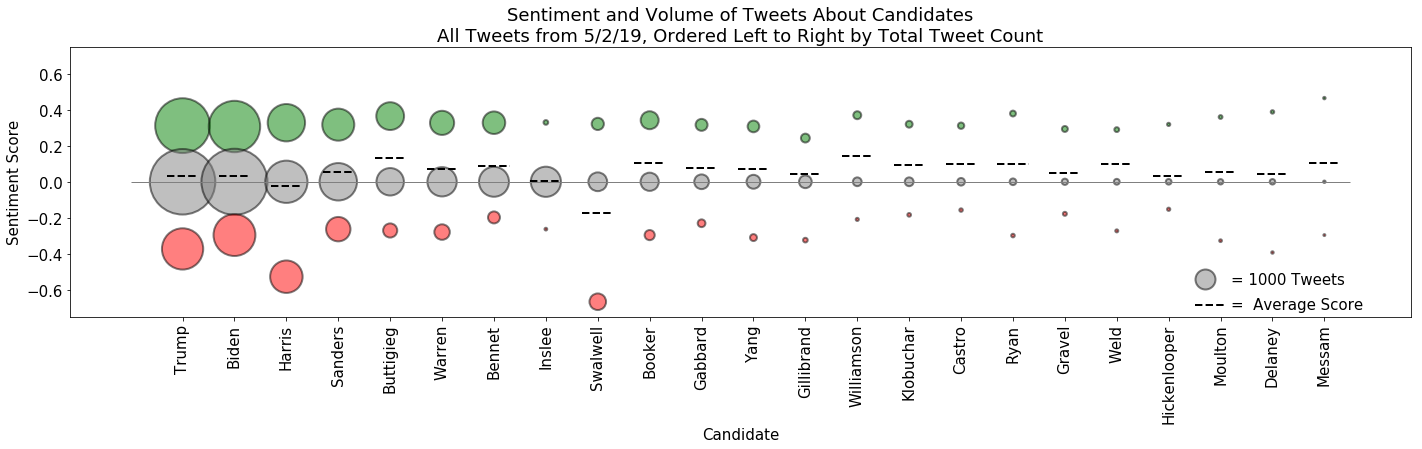

In [244]:
# Assemble bubble values for plotting
plt.figure(figsize=(20, 6.5))

def plot_sentiment_bucket(my_sentiment_bucket, my_color):
    d = df.loc[df['Sentiment Bucket'] == my_sentiment_bucket]
    
    y = d['Average Sentiment Score'].values
    y.reshape(len(x),1)
    
    # Assign bubble sizes based on Count of Tweets
    s = d['Count of Tweets'].values
    
    # Rescale for plotting
    s = [0.75*x for x in s]

    # Reshape for plotting
    s = np.asarray(s).reshape(len(x),1)
    
    # Make plot
    plt.scatter(x, y, s, my_color, alpha=0.5, linewidths=2,edgecolors='black')
    plt.xticks(rotation=90)

sentiment_color = {
    'Positive': 'green',
    'Neutral': 'grey',
    'Negative': 'red',
}

for sentiment in sentiment_color.keys():
    plot_sentiment_bucket(sentiment, sentiment_color[sentiment])
    
plt.xlabel('Candidate')
plt.ylabel('Sentiment Score')
plt.title('Sentiment and Volume of Tweets About Candidates\n' +
          'All Tweets from 5/2/19, Ordered Left to Right by Total Tweet Count')
plt.ylim((-0.75, 0.75)) 

avg_score = pd.DataFrame(data.groupby(['Candidate']).mean()['Sentiment Score'])

def get_ind(my_candidate):
    counter=0
    for candidate in x:
        if candidate.lower() == my_candidate.lower():
            return counter
        else:
            counter +=1
    return float('NaN')

avg_score = avg_score.reset_index()
avg_score['X Coordinate'] = avg_score['Candidate'].apply(get_ind)
avg_score = avg_score.sort_values(['X Coordinate'])

for i, row in avg_score.iterrows():
    candidate, score, xpos = row

    plt.hlines(y=score, xmin=-0.3+xpos, xmax=.3+xpos, linewidth=2, color='black', linestyles='dashed')

plt.rcParams.update({'font.size': 15})
plt.hlines(y=0, xmin=-1, xmax=22.5, linewidth=1, color='grey', linestyles='solid')

plt.text(20.2, -0.57, '= 1000 Tweets', fontsize=15)
plt.scatter(x=[19.7], y=[-0.54], s=[400], c='grey', alpha=0.5, linewidths=2,edgecolors='black')

plt.hlines(y=-0.685, xmin=19.5, xmax=20.1, linewidth=2, color='black', linestyles='dashed')
plt.text(20.2, -0.71, '=  Average Score', fontsize=15)


plt.tight_layout()
file_name = 'snowman.png'
plt.savefig(file_name)
print(f"Saved plot as '{file_name}'.")

plt.show()